In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
import matplotlib.patches as mpatches

In [20]:
import geopandas as gpd

In [23]:
from shapely.geometry import Point

In [3]:
#opening and transfering data into an array
tempMax = xr.open_dataset("/home/mlopez/EXEC/Données test/tasmax_day_BNU-ESM_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1956.nc")

In [4]:
tempMax

<xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 ...
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.

In [5]:
#Transfering array to dataframe and droping NaN values
df = tempMax.to_dataframe().dropna()
df.head()

time_vectors      tasmax
lat       lon        time                ts                           
66.623306 -89.045212 1956-01-01 00:00:00 NaN          1956  240.807495
                                         NaN             1  240.807495
                                         NaN             1  240.807495
                     1956-01-02 00:00:00 NaN          1956  242.874939
                                         NaN             1  242.874939

# Plotting Timeseries

In [6]:
#Grouping by time. Getting rid off latitude and longitud for timeseries. We will plott the mean per day of max temperature
AllcoordTempMean = df.groupby("time").mean()
AllcoordTempMean.head()

,time_vectors,tasmax
time,,
1956-01-01 00:00:00,652.666667,261.011810
1956-01-02 00:00:00,653.000000,263.771912
1956-01-03 00:00:00,653.333333,264.666656
1956-01-04 00:00:00,653.666667,263.498505
1956-01-05 00:00:00,654.000000,261.698914


In [8]:
#Adding column of temperature in Celsius
TempMeanC = AllcoordTempMean
TempMeanC["tasmaxC"] = TempMeanC["tasmax"] -273.15
TempMeanC.head()


,time_vectors,tasmax,tasmaxC
time,,,
1956-01-01 00:00:00,652.666667,261.011810,-12.138184
1956-01-02 00:00:00,653.000000,263.771912,-9.378082
1956-01-03 00:00:00,653.333333,264.666656,-8.483337
1956-01-04 00:00:00,653.666667,263.498505,-9.651489
1956-01-05 00:00:00,654.000000,261.698914,-11.451080


Text(0.5, 1.0, 'Temperature Maximale')

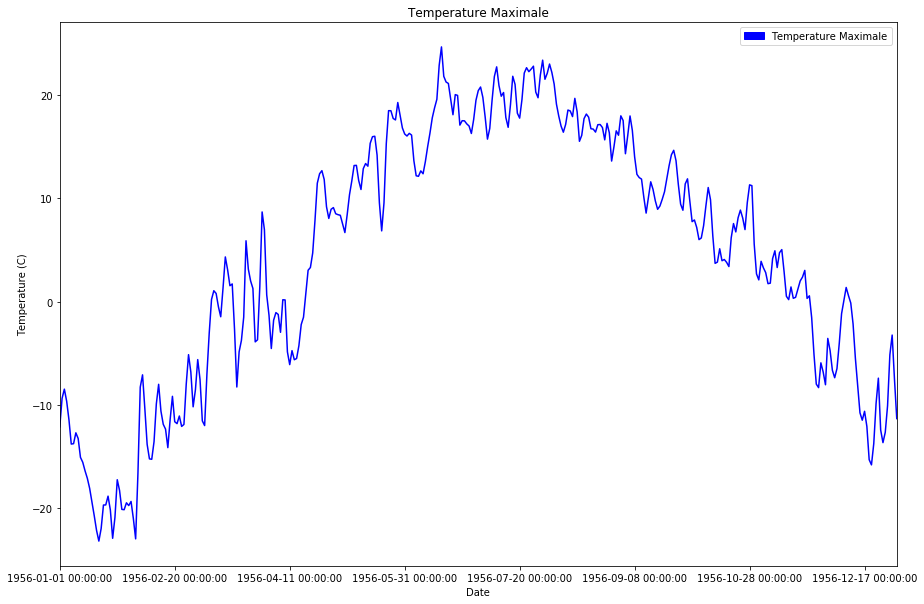

In [9]:
# plot time series
TempMeanC['tasmaxC'].plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
blue_patch = mpatches.Patch(color='blue', label='Temperature Maximale')
plt.legend(handles=[blue_patch,])

# add titles
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Maximale')


# Plotting Map

In [10]:
#Grouping by latitude and longitude. Getting rid off time by doing the mean of all the year for each location point
AlltimeTempMean = df.groupby(["lat","lon"]).mean()
AlltimeTempMean.head()

time_vectors      tasmax
lat       lon                                 
40.041039 -89.045212    659.415525  291.249939
          -88.961884    659.415525  291.233185
          -88.878548    659.415525  291.216064
          -88.795219    659.415525  291.142212
          -88.711891    659.415525  291.161682

In [11]:
#Adding column of temperature in Celsius
AlltimeTempMean["tasmaxC"] = AlltimeTempMean["tasmax"] -273.15

In [12]:
AlltimeTempMean.head()

time_vectors      tasmax    tasmaxC
lat       lon                                            
40.041039 -89.045212    659.415525  291.249939  18.099939
          -88.961884    659.415525  291.233185  18.083185
          -88.878548    659.415525  291.216064  18.066064
          -88.795219    659.415525  291.142212  17.992212
          -88.711891    659.415525  291.161682  18.011682

In [13]:
#Reseting index to get correctly lat and lon column names
GeoTempMeanC = AlltimeTempMean.reset_index()

In [14]:
GeoTempMeanC["tasmaxC"]

0        18.099939
1        18.083185
2        18.066064
3        17.992212
4        18.011682
           ...    
76201    -6.375861
76202    -6.743079
76203    -6.499670
76204    -6.419318
76205    -5.723700
Name: tasmaxC, Length: 76206, dtype: float64

In [15]:
GeoTempMeanC["lat"]

0        40.041039
1        40.041039
2        40.041039
3        40.041039
4        40.041039
           ...    
76201    66.623306
76202    66.623306
76203    66.623306
76204    66.623306
76205    66.623306
Name: lat, Length: 76206, dtype: float64

No handles with labels found to put in legend.


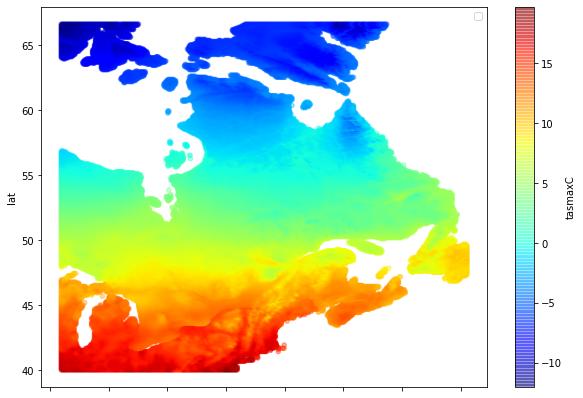

In [16]:
#Plotting map
GeoTempMeanC.plot(kind="scatter", x="lon", y="lat",
    c="tasmaxC", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Converting dataframe to geodataframe with poligon in order to merge through overlay with GeoPandas

In [17]:
GeoTempMeanC.head()

,lat,lon,time_vectors,tasmax,tasmaxC
0,40.041039,-89.045212,659.415525,291.249939,18.099939
1,40.041039,-88.961884,659.415525,291.233185,18.083185
2,40.041039,-88.878548,659.415525,291.216064,18.066064
3,40.041039,-88.795219,659.415525,291.142212,17.992212
4,40.041039,-88.711891,659.415525,291.161682,18.011682


In [25]:
geom = [Point(x,y) for x, y in zip(GeoTempMeanC['lon'], GeoTempMeanC['lat'])]
gdf = gpd.GeoDataFrame(GeoTempMeanC, geometry=geom)
print(gdf.head())

         lat        lon  time_vectors      tasmax    tasmaxC  \
0  40.041039 -89.045212    659.415525  291.249939  18.099939   
1  40.041039 -88.961884    659.415525  291.233185  18.083185   
2  40.041039 -88.878548    659.415525  291.216064  18.066064   
3  40.041039 -88.795219    659.415525  291.142212  17.992212   
4  40.041039 -88.711891    659.415525  291.161682  18.011682   

                     geometry  
0  POINT (-89.04521 40.04104)  
1  POINT (-88.96188 40.04104)  
2  POINT (-88.87855 40.04104)  
3  POINT (-88.79522 40.04104)  
4  POINT (-88.71189 40.04104)  


In [26]:
gdf.head()

,lat,lon,time_vectors,tasmax,tasmaxC,geometry
0,40.041039,-89.045212,659.415525,291.249939,18.099939,POINT (-89.04521 40.04104)
1,40.041039,-88.961884,659.415525,291.233185,18.083185,POINT (-88.96188 40.04104)
2,40.041039,-88.878548,659.415525,291.216064,18.066064,POINT (-88.87855 40.04104)
3,40.041039,-88.795219,659.415525,291.142212,17.992212,POINT (-88.79522 40.04104)
4,40.041039,-88.711891,659.415525,291.161682,18.011682,POINT (-88.71189 40.04104)
